In [61]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [213]:
'''
'''
start_time = pd.to_datetime('2022-04-9 23:00:00') 
end_time = pd.to_datetime('2022-04-10 07:00:00')
# folder  
curr_path = "./filtered_bbox/"
print(start_time,end_time )

2022-04-09 23:00:00 2022-04-10 07:00:00


In [214]:
# file loading for dining hall
files = ["MAE D1 mini 03.txt", "MAE D1 mini 04.txt",
        "MAE D1 mini 07.txt","MAE D1 mini 12.txt" ]#, "MAE D1 mini 13.txt"]#, "MAE D1 mini 12.txt"] #"MAE D1 mini 04.txt", 

pairing = ["sense_03",  
           "sense_04", 
           "sense_07",
          "sense_12",] #"

sensors = {"sense_03":[],  
           "sense_04":[],
           "sense_07":[], 
           "sense_12":[]
          } # 
for idx, file in enumerate(files):
    sensors[pairing[idx]] = pd.read_csv(curr_path+file, sep = '\t')


In [215]:
# time slicing
for key, val in sensors.items():
    item1 = sensors[key]
    item1.columns = ["time", "name", "value"]
    item1 = item1.drop(["name"], axis = 1)
    item1.time = item1.apply(pd.to_datetime)
    item1 = item1[item1["time"] >= start_time]
    item1 = item1[item1["time"] <= end_time]
    item1["delta"] = ((item1.iloc[0].time-item1.time).astype(int))/60000000000
    sensors[key] = item1

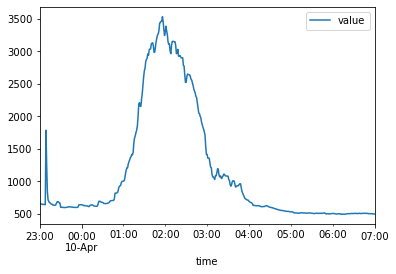

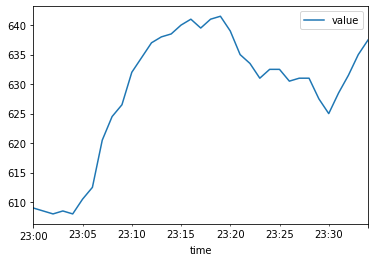

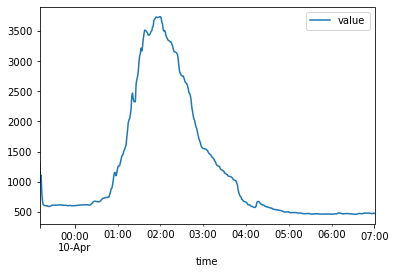

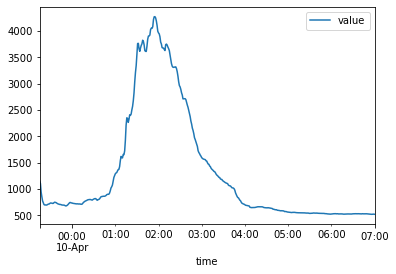

In [216]:
for key, val in sensors.items():
    val.plot(x = "time", y = "value")

In [217]:
# slopes
slopes = []
for key, val in sensors.items():
    slope, _, _, _, _ = stats.linregress(val.delta, val.value)
    slopes.append(slope)

In [218]:
# decay rate
slopes

[1.7572767768566526, -0.653781512605042, 2.34568029694809, 2.741826623909288]

In [219]:
# correlation
df = pd.DataFrame()
for key, val in sensors.items():
    arr = pd.Series(val.value, copy=False)
    arr = arr.reset_index(drop=True)#keys = [i for i in range(len(val.value))])
    df[key] = arr

df.head()




,sense_03,sense_04,sense_07,sense_12
0,498.5,637.5,476.0,521.0
1,500.5,635.0,475.0,523.5
2,499.5,631.5,482.5,522.0
3,503.0,628.5,472.5,521.0
4,505.5,625.0,473.0,520.0


In [220]:
df.corr()

,sense_03,sense_04,sense_07,sense_12
sense_03,1.000000,-0.020542,0.994689,0.993262
sense_04,-0.020542,1.000000,0.602656,0.012191
sense_07,0.994689,0.602656,1.000000,0.996766
sense_12,0.993262,0.012191,0.996766,1.000000
